## NBA GM Draft Picks Analysis - Part 1: Historical Data

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import requests
import time
import json
from bs4 import BeautifulSoup

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
years = list(range(2012,2022))

### Scraping from Basketball Reference - Historical Draft Picks

In [5]:
draft_pick_url = 'https://www.basketball-reference.com/draft/NBA_{}.html'

In [6]:
for year in years:
    url = draft_pick_url.format(year)
    data = requests.get(url)
    
    with open("C:/Users/kevin/Jupyter Notebook Projects/draft pick data/{}.html".format(year), "w+", encoding='utf-8') as f:
        f.write(data.text)

Testing with just 2012 to see how the data looks.

In [21]:
with open("C:/Users/kevin/Jupyter Notebook Projects/draft pick data/2012.html", encoding='utf-8') as f:
    page = f.read()
    
soup = BeautifulSoup(page, "html.parser")

draftpick2012 = soup.find(id="stats")

draftpick2012 = pd.read_html(str(draftpick2012))[0]

draftpick2012

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0  \
                   Rk                 Pk                 Tm   
0                   1                  1                NOH   
1                   2                  2                CHA   
2                   3                  3                WAS   
3                   4                  4                CLE   
4                   5                  5                SAC   
..                ...                ...                ...   
57                 56                 56                TOR   
58                 57                 57                NJN   
59                 58                 58                MIN   
60                 59                 59                SAS   
61                 60                 60                LAL   

                   Round 1           Unnamed: 5_level_0 Totals                \
                    Player   College                Yrs      G     MP    PTS   
0            Anthony Davis  Kentucky                 13    766  26449  18498   
1   Michael Kidd-Gilchrist  Kentucky                  8    446  10978   3750   
2             Bradley Beal   Florida                 13    769  26580  16753   
3             Dion Waiters  Syracuse                  8    419  11835   5505   
4          Thomas Robinson    Kansas                  5    313   4204   1528   
..                     ...       ...                ...    ...    ...    ...   
57       Tomislav ZubÄiÄ       NaN                NaN    NaN    NaN    NaN   
58          Ä°lkan Karaman       NaN                NaN    NaN    NaN    NaN   
59           Robbie Hummel    Purdue                  2     98   1397    379   
60           Marcus Denmon  Missouri                NaN    NaN    NaN    NaN   
61            Robert Sacre   Gonzaga                  4    189   2745    787   

               Shooting             Per Game                  Advanced        \
     TRB   AST      FG%   3P%   FT%       MP   PTS   TRB  AST       WS WS/48   
0   8172  1934     .523  .298  .794     34.5  24.1  10.7  2.5    116.5  .211   
1   2420   515     .474  .272  .715     24.6   8.4   5.4  1.2     21.0  .092   
2   3150  3303     .463  .376  .821     34.6  21.8   4.1  4.3     56.9  .103   
3   1108  1163     .412  .346  .694     28.2  13.1   2.6  2.8      8.8  .036   
4   1507   190     .470  .000  .505     13.4   4.9   4.8  0.6      4.6  .053   
..   ...   ...      ...   ...   ...      ...   ...   ...  ...      ...   ...   
57   NaN   NaN      NaN   NaN   NaN      NaN   NaN   NaN  NaN      NaN   NaN   
58   NaN   NaN      NaN   NaN   NaN      NaN   NaN   NaN  NaN      NaN   NaN   
59   266    50     .418  .343  .867     14.3   3.9   2.7  0.5      1.9  .066   
60   NaN   NaN      NaN   NaN   NaN      NaN   NaN   NaN  NaN      NaN   NaN   
61   593   126     .436  .000  .671     14.5   4.2   3.1  0.7      2.4  .042   

                
     BPM  VORP  
0    5.9  52.9  
1   -1.8   0.6  
2    1.6  23.7  
3   -2.1  -0.4  
4   -3.5  -1.6  
..   ...   ...  
57   NaN   NaN  
58   NaN   NaN  
59  -3.1  -0.4  
60   NaN   NaN  
61  -4.0  -1.4  

[62 rows x 22 columns]

In [22]:
draftpick2012.columns = draftpick2012.columns.droplevel(0)

In [26]:
draftpick2012["Year"] = 2012

In [27]:
draftpick2012.columns

Index(['Rk', 'Pk', 'Tm', 'Player', 'College', 'Yrs', 'G', 'MP', 'PTS', 'TRB',
       'AST', 'FG%', '3P%', 'FT%', 'MP', 'PTS', 'TRB', 'AST', 'WS', 'WS/48',
       'BPM', 'VORP', 'Year'],
      dtype='object')

In [28]:
drop_cols = ['Rk', 'College', 'Yrs', 'G', 'MP', 'PTS', 'TRB',
       'AST', 'FG%', '3P%', 'FT%', 'MP', 'PTS', 'TRB', 'AST', 'WS', 'WS/48',
       'BPM', 'VORP']
draftpick2012 = draftpick2012.drop(drop_cols, axis = 1)

In [12]:
draftpick2012

,Pk,Tm,Player
0,1,NOH,Anthony Davis
1,2,CHA,Michael Kidd-Gilchrist
2,3,WAS,Bradley Beal
3,4,CLE,Dion Waiters
4,5,SAC,Thomas Robinson
...,...,...,...
57,56,TOR,Tomislav ZubÄiÄ
58,57,NJN,Ä°lkan Karaman
59,58,MIN,Robbie Hummel
60,59,SAS,Marcus Denmon


### Loop for Yearly Stats

In [82]:
dfs = []
for year in years:
    file_path = f"C:/Users/kevin/Jupyter Notebook Projects/draft pick data/{year}.html"
    
    with open(file_path, encoding='utf-8') as f:
        page = f.read()
    
    soup = BeautifulSoup(page, "html.parser")
    draftpicksstats = soup.find(id="stats")
    draftpicks = pd.read_html(str(draftpicksstats))[0]
    
    # Drop the first level of the columns
    draftpicks.columns = draftpicks.columns.droplevel(0)
    
    # Now add the 'Year' column after dropping the level
    draftpicks["Year"] = year
    
    # Drop unwanted columns
    drop_cols = ['Rk', 'College', 'Yrs', 'G', 'MP', 'PTS', 'TRB',
       'AST', 'FG%', '3P%', 'FT%', 'MP', 'PTS', 'TRB', 'AST', 'WS', 'WS/48',
       'BPM', 'VORP']
    draftpicks = draftpicks.drop(drop_cols, axis=1)
    
    # Append the cleaned data to the list
    dfs.append(draftpicks)

In [83]:
draftpicks_df = pd.concat(dfs)

In [84]:
draftpicks_df

,Pk,Tm,Player,Year
0,1,NOH,Anthony Davis,2012
1,2,CHA,Michael Kidd-Gilchrist,2012
2,3,WAS,Bradley Beal,2012
3,4,CLE,Dion Waiters,2012
4,5,SAC,Thomas Robinson,2012
...,...,...,...,...
57,56,CHO,Scottie Lewis,2021
58,57,CHO,BalÅ¡a Koprivica,2021
59,58,NYK,Jericho Sims,2021
60,59,BRK,RaiQuan Gray,2021


In [85]:
draftpicks_df['Rookie Year'] = draftpicks_df['Year'] + 1
draftpicks_df['Sophomore Year'] = draftpicks_df['Year'] + 2
draftpicks_df['Third Year'] = draftpicks_df['Year'] + 3

In [86]:
draftpicks_df[draftpicks_df['Player'] == 'Guerschon Yabusele']

,Pk,Tm,Player,Year,Rookie Year,Sophomore Year,Third Year
15,16,BOS,Guerschon Yabusele,2016,2017,2018,2019


In [87]:
draftpicks_df.to_csv('C:/Users/kevin/Downloads/draft picks 2012-2021.csv', index=False)

In [88]:
draftpicks_df = pd.read_csv('C:/Users/kevin/Downloads/draft picks 2012-2021.csv')

### Scraping from Basketball Reference - Historical Win Shares Data

In [40]:
win_shares_url = 'https://www.basketball-reference.com/leagues/NBA_{}_advanced.html'

In [104]:
years = list(range(2012,2025))

In [106]:
for year in years:
    url = win_shares_url.format(year)
    data = requests.get(url)
    
    with open("C:/Users/kevin/Jupyter Notebook Projects/win shares stats/{}.html".format(year), "w+", encoding='utf-8') as f:
        f.write(data.text)

Testing with just 2012 to see how the data looks.

In [45]:
with open("C:/Users/kevin/Jupyter Notebook Projects/win shares stats/2012.html", encoding='utf-8') as f:
    page = f.read()
    
soup = BeautifulSoup(page, "html.parser")

winsharesstats2012 = soup.find(id="advanced")

winsharesstats2012 = pd.read_html(str(winsharesstats2012))[0]
winsharesstats2012["Year"] = year

winsharesstats2012

,Rk,Player,Age,Team,Pos,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Awards,Year
0,1.0,Kevin Durant,23.0,OKC,SF,66.0,66.0,2546.0,26.2,0.610,0.265,0.386,1.9,20.4,11.8,17.5,1.8,2.2,14.0,31.3,8.5,3.7,12.2,0.230,6.2,0.8,7.0,5.8,"MVP-2,AS,NBA1",2021
1,2.0,Pau Gasol,31.0,LAL,PF,65.0,65.0,2430.0,20.4,0.547,0.029,0.285,8.8,21.8,15.6,17.2,0.8,2.6,12.1,22.1,5.2,3.1,8.3,0.165,2.6,0.8,3.4,3.3,NaN,2021
2,3.0,Rudy Gay,25.0,MEM,SF,65.0,65.0,2422.0,17.8,0.521,0.162,0.246,6.1,14.1,10.1,10.8,2.1,1.8,12.0,25.1,2.8,3.3,6.0,0.120,1.7,0.2,1.9,2.4,NaN,2021
3,4.0,Blake Griffin,22.0,LAC,PF,66.0,66.0,2392.0,23.4,0.557,0.016,0.458,10.7,25.1,17.8,16.6,1.2,1.7,10.9,26.6,6.6,2.6,9.2,0.185,3.9,-0.2,3.7,3.4,"AS,NBA2",2021
4,5.0,John Wall,21.0,WAS,PG,66.0,66.0,2386.0,17.7,0.502,0.047,0.450,2.2,12.0,7.1,36.9,2.1,1.8,19.2,24.9,1.7,1.9,3.5,0.071,1.3,-0.6,0.7,1.6,NaN,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,475.0,Earl Barron,30.0,GSW,C,2.0,0.0,9.0,4.7,0.500,0.000,0.000,12.6,0.0,6.3,0.0,0.0,0.0,0.0,20.5,0.0,0.0,0.0,0.054,-11.5,-4.8,-16.3,0.0,NaN,2021
548,476.0,Keith Benson,23.0,GSW,C,3.0,0.0,9.0,6.0,0.000,0.000,0.000,25.3,12.6,18.9,0.0,0.0,0.0,0.0,5.1,0.0,0.0,0.0,-0.005,-1.4,-6.3,-7.7,0.0,NaN,2021
549,477.0,Brian Skinner,35.0,MEM,C,1.0,0.0,4.0,-14.7,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.3,0.0,0.0,0.0,-0.248,-12.5,-3.0,-15.5,0.0,NaN,2021
550,478.0,Hamady N'Diaye,25.0,WAS,C,3.0,0.0,3.0,-13.1,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.9,0.0,0.0,0.0,-0.369,-12.3,-8.8,-21.1,0.0,NaN,2021


In [46]:
winsharesstats2012.columns

Index(['Rk', 'Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'MP', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP',
       'Awards', 'Year'],
      dtype='object')

In [47]:
drop_cols = ['Rk', 'Age', 'G', 'GS', 'MP', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'OWS', 'DWS', 'OBPM', 'DBPM', 'BPM', 'VORP',
       'Awards']
winsharesstats2012 = winsharesstats2012.drop(drop_cols, axis = 1)

In [48]:
winsharesstats2012

,Player,Team,Pos,WS,WS/48,Year
0,Kevin Durant,OKC,SF,12.2,0.230,2021
1,Pau Gasol,LAL,PF,8.3,0.165,2021
2,Rudy Gay,MEM,SF,6.0,0.120,2021
3,Blake Griffin,LAC,PF,9.2,0.185,2021
4,John Wall,WAS,PG,3.5,0.071,2021
...,...,...,...,...,...,...
547,Earl Barron,GSW,C,0.0,0.054,2021
548,Keith Benson,GSW,C,0.0,-0.005,2021
549,Brian Skinner,MEM,C,0.0,-0.248,2021
550,Hamady N'Diaye,WAS,C,0.0,-0.369,2021


Need to clean out duplicate rows of players. Instead of keeping the TOT row, I will want to keep the row corresponding to the acquiring team.

### Loop for Yearly Stats

In [107]:
dfs = []
for year in years:
    file_path = f"C:/Users/kevin/Jupyter Notebook Projects/win shares stats/{year}.html"
    
    with open(file_path, encoding='utf-8') as f:
        page = f.read()
    soup = BeautifulSoup(page, "html.parser")
    winsharesstats = soup.find(id="advanced")
    winshares = pd.read_html(str(winsharesstats))[0]
    winshares["Year"] = year
    
    drop_cols = ['Rk', 'Age', 'G', 'GS', 'MP', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'OWS', 'DWS', 'OBPM', 'DBPM', 'BPM', 'VORP',
       'Awards']
    winshares = winshares.drop(drop_cols, axis = 1)
    
    dfs.append(winshares)

In [108]:
winshares_df = pd.concat(dfs)

In [109]:
winshares_df.columns

Index(['Player', 'Team', 'Pos', 'WS', 'WS/48', 'Year'], dtype='object')

In [110]:
winshares_df[winshares_df['Player'] == 'Rajon Rondo']

,Player,Team,Pos,WS,WS/48,Year
56,Rajon Rondo,BOS,PG,4.9,0.121,2012
222,Rajon Rondo,BOS,PG,3.2,0.108,2013
305,Rajon Rondo,BOS,PG,1.1,0.054,2014
130,Rajon Rondo,2TM,PG,1.6,0.037,2015
131,Rajon Rondo,BOS,PG,0.9,0.064,2015
132,Rajon Rondo,DAL,PG,0.6,0.023,2015
36,Rajon Rondo,SAC,PG,4.6,0.087,2016
150,Rajon Rondo,CHI,PG,2.3,0.060,2017
173,Rajon Rondo,NOP,PG,3.6,0.101,2018
267,Rajon Rondo,LAL,PG,1.3,0.047,2019


In [111]:
def single_year(df):
    unique_teams = df["Team"].nunique()  # Get the number of unique teams
    
    if unique_teams == 1:
        return df  # Return the row if player only played for one team
    elif unique_teams == 3:
        return df[df["Team"] == "2TM"]
    elif unique_teams == 4:
        return df[df["Team"] == "3TM"]
    elif unique_teams == 5:
        return df[df["Team"] == "4TM"]
    else:
        return df

In [112]:
winshares_df['Team'].unique()

array(['OKC', 'LAL', 'MEM', 'LAC', 'WAS', 'MIL', 'ATL', 'MIA', 'POR',
       'PHI', 'TOR', 'SAC', 'NJN', 'CLE', 'MIN', 'DET', 'CHI', 'DEN',
       'GSW', '2TM', 'PHO', 'UTA', 'DAL', 'BOS', 'ORL', 'HOU', 'IND',
       'NYK', 'NOH', 'SAS', 'CHA', '3TM', nan, 'BRK', 'NOP', 'CHO', '4TM'],
      dtype=object)

In [113]:
winshares_df = winshares_df.groupby(["Player", "Year"]).apply(single_year).reset_index(drop=True)

In [114]:
winshares_df[winshares_df['Player'] == 'Rajon Rondo']

,Player,Team,Pos,WS,WS/48,Year
5337,Rajon Rondo,BOS,PG,4.9,0.121,2012
5338,Rajon Rondo,BOS,PG,3.2,0.108,2013
5339,Rajon Rondo,BOS,PG,1.1,0.054,2014
5340,Rajon Rondo,2TM,PG,1.6,0.037,2015
5341,Rajon Rondo,SAC,PG,4.6,0.087,2016
5342,Rajon Rondo,CHI,PG,2.3,0.060,2017
5343,Rajon Rondo,NOP,PG,3.6,0.101,2018
5344,Rajon Rondo,LAL,PG,1.3,0.047,2019
5345,Rajon Rondo,LAL,PG,1.4,0.068,2020
5346,Rajon Rondo,2TM,PG,1.3,0.081,2021


In [115]:
winshares_df.to_csv('C:/Users/kevin/Downloads/win shares stats 2012-2021.csv', index=False)

In [116]:
winshares_df = pd.read_csv('C:/Users/kevin/Downloads/win shares stats 2012-2021.csv')

## Merging the Two Dataframes

In [89]:
draftpicks_df.columns

Index(['Pk', 'Tm', 'Player', 'Year', 'Rookie Year', 'Sophomore Year',
       'Third Year'],
      dtype='object')

In [78]:
winshares_df.columns

Index(['Player', 'Team', 'Pos', 'WS', 'WS/48', 'Year'], dtype='object')

In [117]:
merged_df = pd.merge(draftpicks_df, winshares_df[['Player', 'Year', 'WS']], 
                     left_on=['Player', 'Rookie Year'], 
                     right_on=['Player', 'Year'], 
                     how='left')

In [118]:
merged_df = pd.merge(merged_df, winshares_df[['Player', 'Year', 'WS']], 
                     left_on=['Player', 'Sophomore Year'], 
                     right_on=['Player', 'Year'], 
                     how='left')

In [119]:
merged_df = pd.merge(merged_df, winshares_df[['Player', 'Year', 'WS']], 
                     left_on=['Player', 'Third Year'], 
                     right_on=['Player', 'Year'], 
                     how='left')

C:\Users\kevin\AppData\Local\Temp\ipykernel_15636\2676856219.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Year_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = pd.merge(merged_df, winshares_df[['Player', 'Year', 'WS']],


In [120]:
merged_df

,Pk,Tm,Player,Year_x,Rookie Year,Sophomore Year,Third Year,Year_y,WS_x,Year_x,WS_y,Year_y,WS
0,1,NOH,Anthony Davis,2012,2013,2014,2015,2013.0,6.1,2014.0,10.4,2015.0,14.0
1,2,CHA,Michael Kidd-Gilchrist,2012,2013,2014,2015,2013.0,2.1,2014.0,3.1,2015.0,3.8
2,3,WAS,Bradley Beal,2012,2013,2014,2015,2013.0,3.0,2014.0,4.0,2015.0,3.7
3,4,CLE,Dion Waiters,2012,2013,2014,2015,2013.0,0.9,2014.0,1.6,2015.0,1.1
4,5,SAC,Thomas Robinson,2012,2013,2014,2015,2013.0,-0.1,2014.0,1.6,2015.0,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,56,CHO,Scottie Lewis,2021,2022,2023,2024,2022.0,0.0,NaN,NaN,NaN,NaN
617,57,CHO,BalÅ¡a Koprivica,2021,2022,2023,2024,NaN,NaN,NaN,NaN,NaN,NaN
618,58,NYK,Jericho Sims,2021,2022,2023,2024,2022.0,1.5,2023.0,2.6,2024.0,1.5
619,59,BRK,RaiQuan Gray,2021,2022,2023,2024,NaN,NaN,2023.0,0.1,2024.0,0.2


In [121]:
winshares_df[winshares_df['Player'] == 'Anthony Davis']

,Player,Team,Pos,WS,WS/48,Year
335,Anthony Davis,NOH,PF,6.1,0.159,2013
336,Anthony Davis,NOP,PF,10.4,0.212,2014
337,Anthony Davis,NOP,PF,14.0,0.274,2015
338,Anthony Davis,NOP,C,7.2,0.160,2016
339,Anthony Davis,NOP,C,11.0,0.195,2017
340,Anthony Davis,NOP,PF,13.7,0.241,2018
341,Anthony Davis,NOP,C,9.5,0.247,2019
342,Anthony Davis,LAL,PF,11.1,0.250,2020
343,Anthony Davis,LAL,PF,3.7,0.152,2021
344,Anthony Davis,LAL,C,4.5,0.155,2022


In [122]:
merged_df = merged_df.rename(columns={
    'WS_x': 'Rookie_WS',
    'WS_y': 'Sophomore_WS',
    'WS': 'Third_WS'
})

In [123]:
merged_df[merged_df['Player'] == 'Anthony Davis']

,Pk,Tm,Player,Year_x,Rookie Year,Sophomore Year,Third Year,Year_y,Rookie_WS,Year_x,Sophomore_WS,Year_y,Third_WS
0,1,NOH,Anthony Davis,2012,2013,2014,2015,2013.0,6.1,2014.0,10.4,2015.0,14.0


In [126]:
merged_df[merged_df['Year_x'] == 2021]

,Pk,Tm,Player,Year_x,Rookie Year,Sophomore Year,Third Year,Year_y,Rookie_WS,Year_x.1,Sophomore_WS,Year_y.1,Third_WS
559,1,DET,Cade Cunningham,2021,2022,2023,2024,2022.0,-0.5,2023.0,-0.1,2024.0,1.8
560,2,HOU,Jalen Green,2021,2022,2023,2024,2022.0,0.7,2023.0,1.8,2024.0,3.1
561,3,CLE,Evan Mobley,2021,2022,2023,2024,2022.0,5.2,2023.0,8.5,2024.0,5.5
562,4,TOR,Scottie Barnes,2021,2022,2023,2024,2022.0,6.6,2023.0,5.0,2024.0,4.3
563,5,ORL,Jalen Suggs,2021,2022,2023,2024,2022.0,-1.6,2023.0,1.4,2024.0,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,56,CHO,Scottie Lewis,2021,2022,2023,2024,2022.0,0.0,NaN,NaN,NaN,NaN
617,57,CHO,BalÅ¡a Koprivica,2021,2022,2023,2024,NaN,NaN,NaN,NaN,NaN,NaN
618,58,NYK,Jericho Sims,2021,2022,2023,2024,2022.0,1.5,2023.0,2.6,2024.0,1.5
619,59,BRK,RaiQuan Gray,2021,2022,2023,2024,NaN,NaN,2023.0,0.1,2024.0,0.2


In [11]:
merged_df.isnull().sum()

Pk                 10
Tm                 10
Player              0
Year_x              0
Rookie Year         0
Sophomore Year      0
Third Year          0
Year_y            137
Rookie_WS         137
Year_x.1          130
Sophomore_WS      130
Year_y.1          184
Third_WS          184
dtype: int64

In [12]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pk              611 non-null    object 
 1   Tm              611 non-null    object 
 2   Player          621 non-null    object 
 3   Year_x          621 non-null    int64  
 4   Rookie Year     621 non-null    int64  
 5   Sophomore Year  621 non-null    int64  
 6   Third Year      621 non-null    int64  
 7   Year_y          484 non-null    float64
 8   Rookie_WS       484 non-null    float64
 9   Year_x.1        491 non-null    float64
 10  Sophomore_WS    491 non-null    float64
 11  Year_y.1        437 non-null    float64
 12  Third_WS        437 non-null    float64
dtypes: float64(6), int64(4), object(3)
memory usage: 63.2+ KB


In [14]:
merged_df['Pk'] = merged_df['Pk'].fillna(0)

In [16]:
print(merged_df['Pk'].unique())

['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30' 0
 'Pk' '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43'
 '44' '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55' '56' '57'
 '58' '59' '60']


In [17]:
merged_df[merged_df['Pk'] == 'Pk']

,Pk,Tm,Player,Year_x,Rookie Year,Sophomore Year,Third Year,Year_y,Rookie_WS,Year_x.1,Sophomore_WS,Year_y.1,Third_WS
31,Pk,Tm,Player,2012,2013,2014,2015,NaN,NaN,NaN,NaN,NaN,NaN
93,Pk,Tm,Player,2013,2014,2015,2016,NaN,NaN,NaN,NaN,NaN,NaN
156,Pk,Tm,Player,2014,2015,2016,2017,NaN,NaN,NaN,NaN,NaN,NaN
218,Pk,Tm,Player,2015,2016,2017,2018,NaN,NaN,NaN,NaN,NaN,NaN
280,Pk,Tm,Player,2016,2017,2018,2019,NaN,NaN,NaN,NaN,NaN,NaN
342,Pk,Tm,Player,2017,2018,2019,2020,NaN,NaN,NaN,NaN,NaN,NaN
404,Pk,Tm,Player,2018,2019,2020,2021,NaN,NaN,NaN,NaN,NaN,NaN
466,Pk,Tm,Player,2019,2020,2021,2022,NaN,NaN,NaN,NaN,NaN,NaN
528,Pk,Tm,Player,2020,2021,2022,2023,NaN,NaN,NaN,NaN,NaN,NaN
590,Pk,Tm,Player,2021,2022,2023,2024,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
merged_df = merged_df[merged_df['Pk'] != 'Pk']

In [19]:
merged_df['Pk'] = merged_df['Pk'].astype(int)

In [20]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 611 entries, 0 to 620
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pk              611 non-null    int32  
 1   Tm              601 non-null    object 
 2   Player          611 non-null    object 
 3   Year_x          611 non-null    int64  
 4   Rookie Year     611 non-null    int64  
 5   Sophomore Year  611 non-null    int64  
 6   Third Year      611 non-null    int64  
 7   Year_y          484 non-null    float64
 8   Rookie_WS       484 non-null    float64
 9   Year_x.1        491 non-null    float64
 10  Sophomore_WS    491 non-null    float64
 11  Year_y.1        437 non-null    float64
 12  Third_WS        437 non-null    float64
dtypes: float64(6), int32(1), int64(4), object(2)
memory usage: 64.4+ KB


The following dataset has every pick for the last ten years before 2022 and the win shares in the seasons following the year they were drafted.

In [21]:
merged_df.to_csv('C:/Users/kevin/Downloads/draft pick win shares 2012-2021.csv', index=False)

In [22]:
merged_df = pd.read_csv('C:/Users/kevin/Downloads/draft pick win shares 2012-2021.csv')

## Creating Expected Win Share Values

In [27]:
grouped_data = merged_df.groupby('Pk').agg({
    'Rookie_WS': 'sum',
    'Sophomore_WS': 'sum',
    'Third_WS': 'sum'
}).reset_index()

In [28]:
grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pk            61 non-null     int64  
 1   Rookie_WS     61 non-null     float64
 2   Sophomore_WS  61 non-null     float64
 3   Third_WS      61 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 2.0 KB


In [29]:
grouped_data.sort_values(by='Pk', ascending=True)

,Pk,Rookie_WS,Sophomore_WS,Third_WS
0,0,0.0,0.0,0.0
1,1,24.4,53.0,57.2
2,2,15.2,21.3,30.1
3,3,25.2,44.4,38.9
4,4,20.4,24.8,24.9
...,...,...,...,...
56,56,0.2,0.0,-0.2
57,57,0.1,0.3,0.0
58,58,2.3,6.2,6.2
59,59,0.3,0.4,0.2


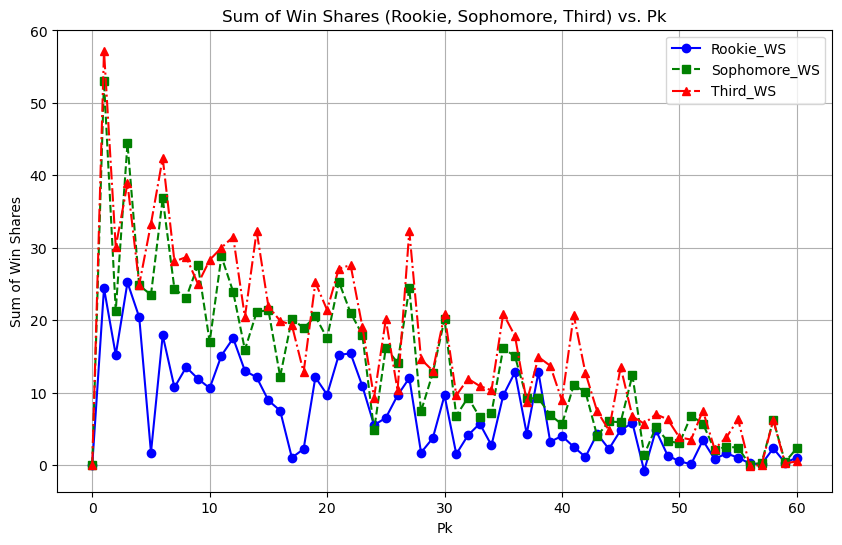

In [30]:
plt.figure(figsize=(10, 6))

# Plot Rookie_WS
plt.plot(grouped_data['Pk'], grouped_data['Rookie_WS'], marker='o', linestyle='-', label='Rookie_WS', color='blue')

# Plot Sophomore_WS
plt.plot(grouped_data['Pk'], grouped_data['Sophomore_WS'], marker='s', linestyle='--', label='Sophomore_WS', color='green')

# Plot Third_WS
plt.plot(grouped_data['Pk'], grouped_data['Third_WS'], marker='^', linestyle='-.', label='Third_WS', color='red')

# Add titles and labels
plt.title('Sum of Win Shares (Rookie, Sophomore, Third) vs. Pk')
plt.xlabel('Pk')
plt.ylabel('Sum of Win Shares')
plt.grid(True)

# Add legend
plt.legend()

# Show plot
plt.show()

The chart above visualizes the expected win shares by draft slot in years 1, 2, and 3.

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Prepare data
X = grouped_data['Pk'].values.reshape(-1, 1)  # Predictor (independent variable)

# Analyze for each target variable
for column in ['Rookie_WS', 'Sophomore_WS', 'Third_WS']:
    y = grouped_data[column].values  # Response (dependent variable)
    
    # Fit linear regression model
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)
    
    # Calculate R-squared
    r2 = r2_score(y, y_pred)
    print(f'R-squared for Pk vs. {column}: {r2:.2f}')

R-squared for Pk vs. Rookie_WS: 0.49
R-squared for Pk vs. Sophomore_WS: 0.61
R-squared for Pk vs. Third_WS: 0.63


In [35]:
for column in ['Rookie_WS', 'Sophomore_WS', 'Third_WS']:
    y = grouped_data[column].values
    X = grouped_data['Pk'].values.reshape(-1, 1)  # Reshape for sklearn
    
    # Apply log transformation to the dependent variable
    y_log = np.log(y + 1)  # Adding 1 to avoid log(0) if necessary
    
    # Fit a linear regression model to the transformed data
    model = LinearRegression()
    model.fit(X, y_log)
    
    # Predict the values
    y_pred_log = model.predict(X)
    
    # Exponentiate to return to the original scale
    y_pred = np.exp(y_pred_log)
    
    # Calculate R-squared
    r2 = r2_score(y, y_pred)
    print(f'R-squared for Exponential Pk vs. {column}: {r2:.2f}')

R-squared for Exponential Pk vs. Rookie_WS: 0.46
R-squared for Exponential Pk vs. Sophomore_WS: 0.58
R-squared for Exponential Pk vs. Third_WS: 0.57


In [32]:
import numpy as np
from numpy.polynomial.polynomial import Polynomial

# Fit a quadratic model (degree 2)
for column in ['Rookie_WS', 'Sophomore_WS', 'Third_WS']:
    y = grouped_data[column].values
    
    # Fit polynomial regression
    p = Polynomial.fit(grouped_data['Pk'], y, deg=2)
    y_pred = p(grouped_data['Pk'])
    
    # Calculate R-squared
    r2 = r2_score(y, y_pred)
    print(f'R-squared for Quadratic Pk vs. {column}: {r2:.2f}')

R-squared for Quadratic Pk vs. Rookie_WS: 0.49
R-squared for Quadratic Pk vs. Sophomore_WS: 0.61
R-squared for Quadratic Pk vs. Third_WS: 0.63


The R-squared values are relatively moderate. R-squared values around 0.5 to 0.6 suggest that the model explains about 50% to 60% of the variance in the data. Both the linear and quadratic models have the same R-squared values, indicating that the quadratic fit doesn’t provide a significant improvement over the linear model. Therefore, a linear relationship seems to fit the data well enough, especially considering that the relationship between Pk and WS might not be strongly non-linear.

In [33]:
correlations = grouped_data[['Pk', 'Rookie_WS', 'Sophomore_WS', 'Third_WS']].corr()
print(correlations)

                    Pk  Rookie_WS  Sophomore_WS  Third_WS
Pk            1.000000  -0.698740     -0.779070 -0.795042
Rookie_WS    -0.698740   1.000000      0.861908  0.844040
Sophomore_WS -0.779070   0.861908      1.000000  0.943643
Third_WS     -0.795042   0.844040      0.943643  1.000000


There is a strong negative correlation between the draft position (Pk) and WS (for each year), suggesting that players picked later in the draft tend to accumulate fewer win shares, which is consistent with how the draft tends to work—earlier picks typically have better careers.

                            OLS Regression Results                            
Dep. Variable:              Rookie_WS   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     56.29
Date:                Tue, 31 Dec 2024   Prob (F-statistic):           3.81e-10
Time:                        10:57:06   Log-Likelihood:                -179.27
No. Observations:                  61   AIC:                             362.5
Df Residuals:                      59   BIC:                             366.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.8002      1.176     12.587      0.0

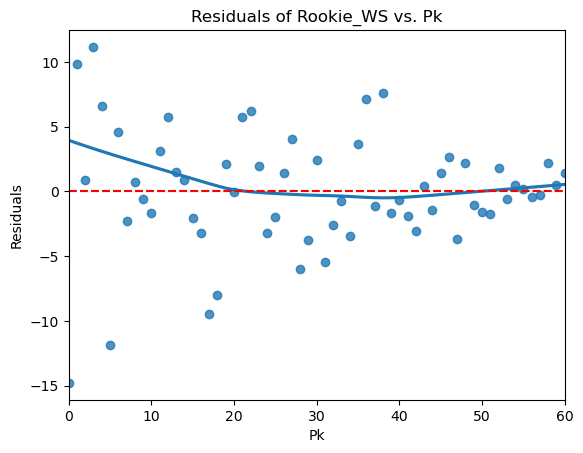

In [34]:
import statsmodels.api as sm

# Fit linear regression model with Statsmodels
X = sm.add_constant(grouped_data['Pk'])  # Add intercept term
y = grouped_data['Rookie_WS']  # Example: using Rookie_WS

model = sm.OLS(y, X).fit()
print(model.summary())

# Plot residuals
residuals = model.resid
sns.residplot(x=grouped_data['Pk'], y=residuals, lowess=True)
plt.title('Residuals of Rookie_WS vs. Pk')
plt.xlabel('Pk')
plt.ylabel('Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.show()

**Coefficients:**
Intercept (const): 14.80
Pk: -0.25
This suggests that for each increase in draft position (a higher Pk value), the Rookie_WS decreases by 0.25, which aligns with the negative correlation found earlier. The intercept value of 14.80 is the expected Rookie_WS when Pk is zero.

**Significance:**
The p-value for the coefficient of Pk is 0.000, which is very small and indicates that the relationship between Pk and Rookie_WS is statistically significant.

**Residual Analysis:**
The Omnibus and Jarque-Bera tests suggest slight non-normality in the residuals, but this doesn't seem to be a major concern given the model's significance.

**Interpretation:** The regression confirms the negative linear relationship between draft position and Rookie_WS. For every increase in Pk, a player's Rookie_WS tends to decrease by about 0.25, which is statistically significant. The R-squared value of 0.49 suggests that there are other factors influencing Rookie_WS beyond just draft position, which is typical in real-world data.

In [36]:
# Initialize a new dataframe
expected_df = pd.DataFrame()

# Set the 'Pk' column (same as in the original dataframe)
expected_df['Pk'] = grouped_data['Pk']

# Initialize linear regression model
model = LinearRegression()

# Predict Rookie_WS based on Pk
model.fit(grouped_data[['Pk']], grouped_data['Rookie_WS'])
expected_df['Rookie_WS'] = model.predict(grouped_data[['Pk']])

# Predict Sophomore_WS based on Pk
model.fit(grouped_data[['Pk']], grouped_data['Sophomore_WS'])
expected_df['Sophomore_WS'] = model.predict(grouped_data[['Pk']])

# Predict Third_WS based on Pk
model.fit(grouped_data[['Pk']], grouped_data['Third_WS'])
expected_df['Third_WS'] = model.predict(grouped_data[['Pk']])

Code above uses a regression to create expected win shares for each slot. It finds expected win shares sums over ten years, so I later divide by 10 to create an average expected win share per draft slot.

In [40]:
# Add Sophomore_AVG: the average of Rookie_WS and Sophomore_WS
expected_df['Sophomore_AVG'] = (expected_df['Rookie_WS'] + expected_df['Sophomore_WS']) / 2

# Add Third_AVG: the average of Rookie_WS, Sophomore_WS, and Third_WS
expected_df['Third_AVG'] = (expected_df['Rookie_WS'] + expected_df['Sophomore_WS'] + expected_df['Third_WS']) / 3

In [41]:
expected_df

,Pk,Rookie_WS,Sophomore_WS,Third_WS,Sophomore_AVG,Third_AVG
0,0,14.800159,28.234955,32.687520,21.517557,25.240878
1,1,14.546547,27.754500,32.150941,21.150524,24.817329
2,2,14.292935,27.274045,31.614363,20.783490,24.393781
3,3,14.039323,26.793591,31.077784,20.416457,23.970233
4,4,13.785711,26.313136,30.541206,20.049424,23.546684
...,...,...,...,...,...,...
56,56,0.597895,1.329487,2.639122,0.963691,1.522168
57,57,0.344283,0.849032,2.102544,0.596658,1.098620
58,58,0.090672,0.368577,1.565965,0.229625,0.675071
59,59,-0.162940,-0.111877,1.029387,-0.137409,0.251523


In [44]:
expected_df.loc[:, expected_df.columns != 'Pk'] = expected_df.loc[:, expected_df.columns != 'Pk'] / 10

In [45]:
expected_df

,Pk,Rookie_WS,Sophomore_WS,Third_WS,Sophomore_AVG,Third_AVG
0,0,1.480016,2.823496,3.268752,2.151756,2.524088
1,1,1.454655,2.775450,3.215094,2.115052,2.481733
2,2,1.429293,2.727405,3.161436,2.078349,2.439378
3,3,1.403932,2.679359,3.107778,2.041646,2.397023
4,4,1.378571,2.631314,3.054121,2.004942,2.354668
...,...,...,...,...,...,...
56,56,0.059790,0.132949,0.263912,0.096369,0.152217
57,57,0.034428,0.084903,0.210254,0.059666,0.109862
58,58,0.009067,0.036858,0.156597,0.022962,0.067507
59,59,-0.016294,-0.011188,0.102939,-0.013741,0.025152


The table above shows the win shares each draft slot is expected to deliver in their first three years.

In [46]:
expected_df.to_csv('C:/Users/kevin/Downloads/draft pick expected win shares.csv', index=False)

In [47]:
expected_df = pd.read_csv('C:/Users/kevin/Downloads/draft pick expected win shares.csv')